In [1]:
import sys
from importlib import reload 
sys.path.append('./lib')

In [2]:
import utils  # expand_to_hyperboloid
utils = reload(utils)

import distances  # Distances, DistancesAggregator, ProductDistances
distances = reload(distances)
from distances import Distances, ProductDistances

import dssm  # DSSM_V2, JustEmbedding
dssm = reload(dssm)

import layers  # SphericalExponentialMapLayer, HyperbolicalExponentialMapLayer
layers = reload(layers)

In [3]:
utils.self_tests()

expand_to_hyperboloid unittest #1


In [4]:
distances.self_tests()

DistancesAggregator unittest #1...
DistancesAggregator unittest #2...
ProductDistances unittest #1...
ProductDistances unittest #2...
ProductDistances unittest #3...
ProductDistances unittest #4...
str(pd) = E2,S3,H3


In [5]:
layers.self_tests()

SphericalExponentialMapLayer UT 1
SphericalExponentialMapLayer UT 2
HyperbolicalExponentialMapLayer UT 1
HyperbolicalExponentialMapLayer UT 2


________________________

In [6]:
import networkx as nx
import numpy as np
import tensorflow as tf
import tqdm

assert int(tf.__version__.split(".")[0]) >= 2

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [7]:
def make_model(l=312):
    return dssm.JustEmbedding(l, emb_size=10)

def make_model_2(emb_size=10, l=312):
    return dssm.JustEmbedding(l, emb_size=emb_size)


def make_distances(for_ranking=False):
    # Just new dists
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l1_hs_corrected" if for_ranking else "triple_trainable_l1_hs",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_ex_corrected" if for_ranking else "triple_trainable_l1_ex",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_ex_corrected" if for_ranking else "triple_trainable_l1_sq_ex",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("hyperspherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (5, Distances("hyperspherical", scalable=True)),
            (5, Distances("hyperspherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("hyperspherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


_____________


In [8]:
with open("bg_20_700_0.05.edges", "w") as f:
    for i in range(20):
        for j in range(700):
            if np.random.random() > 0.95:
                f.write(f"{i} {20 + j}\n")

In [9]:
G, distances_matrix, r_matrix  = utils.get_dataset("bg_20_700_0.05.edges", True, True)
make_model_g = lambda : make_model(len(G.nodes()))
d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))

Loading from ../datasets/bg_20_700_0.05.edges
|V| = 432, |E| = 648


In [ ]:
distortion_loss_storyz = list()

In [14]:
def print_best_distortion():
    for i, d in enumerate(make_distances(False)):
        ar = np.array([
            distortion_loss_story_nth[i][-1]
            for distortion_loss_story_nth in distortion_loss_storyz
        ])
        # print(ar)
        print(f"{ar[:, 0].min(), *ar[:, 1:].max(axis=0)}\t{d}")
        
def do_distortion_for_lr(lr=0.05):
    distortion_loss_storyz.append(
        utils.estimate_signatures_distortion(
            make_model_2, qs, distances_matrix, r_matrix,
            make_distances(False), 2000, learning_rate=lr,
            loss_eval_interval=20, draw_interval=20,
            different_d_sum=True, print_results=True
        )
    )
    
    print("\n\n=== Current global best:\n")
    print_best_distortion()

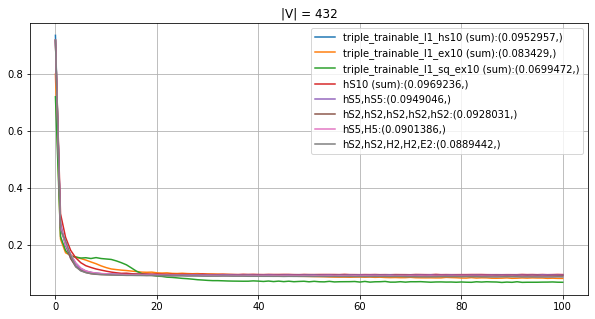


0.0952957	triple_trainable_l1_hs10 (sum)
0.083429	triple_trainable_l1_ex10 (sum)
0.0699472	triple_trainable_l1_sq_ex10 (sum)
0.0969236	hS10 (sum)
0.0949046	hS5,hS5
0.0928031	hS2,hS2,hS2,hS2,hS2
0.0901386	hS5,H5
0.0889442	hS2,hS2,H2,H2,E2


=== Current global best:



NameError: name 'make_distances_exp_dot' is not defined

In [13]:
do_distortion_for_lr(0.1)

In [15]:
print_best_distortion()

(0.0952957,)	triple_trainable_l1_hs10 (sum)
(0.083429,)	triple_trainable_l1_ex10 (sum)
(0.0699472,)	triple_trainable_l1_sq_ex10 (sum)
(0.0969236,)	hS10 (sum)
(0.0949046,)	hS5,hS5
(0.0928031,)	hS2,hS2,hS2,hS2,hS2
(0.0901386,)	hS5,H5
(0.0889442,)	hS2,hS2,H2,H2,E2


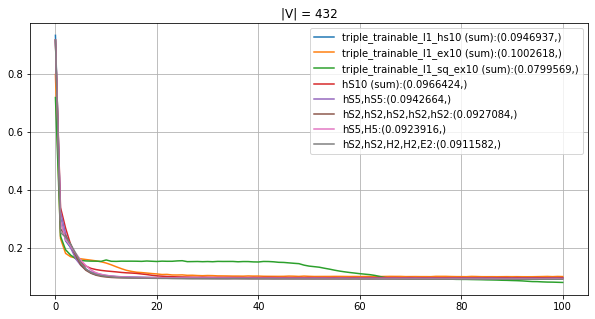


0.0946937	triple_trainable_l1_hs10 (sum)
0.1002618	triple_trainable_l1_ex10 (sum)
0.0799569	triple_trainable_l1_sq_ex10 (sum)
0.0966424	hS10 (sum)
0.0942664	hS5,hS5
0.0927084	hS2,hS2,hS2,hS2,hS2
0.0923916	hS5,H5
0.0911582	hS2,hS2,H2,H2,E2


=== Current global best:

(0.0946937,)	triple_trainable_l1_hs10 (sum)
(0.083429,)	triple_trainable_l1_ex10 (sum)
(0.0699472,)	triple_trainable_l1_sq_ex10 (sum)
(0.0966424,)	hS10 (sum)
(0.0942664,)	hS5,hS5
(0.0927084,)	hS2,hS2,hS2,hS2,hS2
(0.0901386,)	hS5,H5
(0.0889442,)	hS2,hS2,H2,H2,E2


In [16]:
do_distortion_for_lr(0.05)

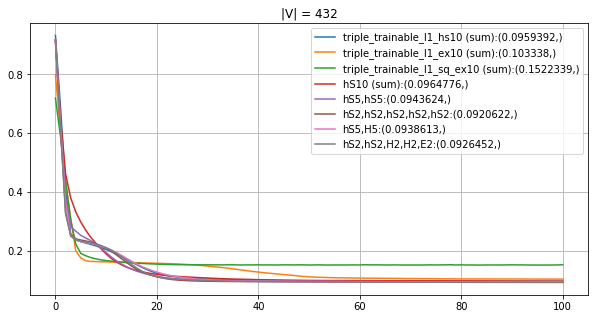


0.0959392	triple_trainable_l1_hs10 (sum)
0.103338	triple_trainable_l1_ex10 (sum)
0.1522339	triple_trainable_l1_sq_ex10 (sum)
0.0964776	hS10 (sum)
0.0943624	hS5,hS5
0.0920622	hS2,hS2,hS2,hS2,hS2
0.0938613	hS5,H5
0.0926452	hS2,hS2,H2,H2,E2


=== Current global best:

(0.0946937,)	triple_trainable_l1_hs10 (sum)
(0.083429,)	triple_trainable_l1_ex10 (sum)
(0.0699472,)	triple_trainable_l1_sq_ex10 (sum)
(0.0964776,)	hS10 (sum)
(0.0942664,)	hS5,hS5
(0.0920622,)	hS2,hS2,hS2,hS2,hS2
(0.0901386,)	hS5,H5
(0.0889442,)	hS2,hS2,H2,H2,E2


In [17]:
do_distortion_for_lr(0.01)

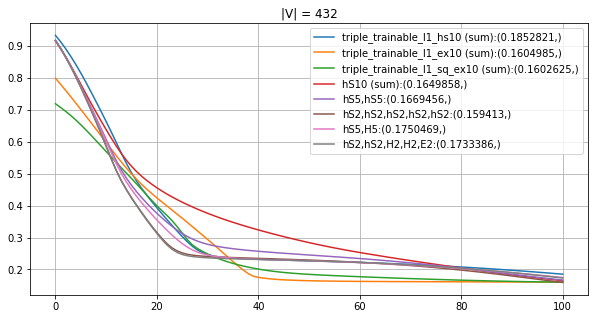


0.1852821	triple_trainable_l1_hs10 (sum)
0.1604985	triple_trainable_l1_ex10 (sum)
0.1602625	triple_trainable_l1_sq_ex10 (sum)
0.1649858	hS10 (sum)
0.1669456	hS5,hS5
0.159413	hS2,hS2,hS2,hS2,hS2
0.1750469	hS5,H5
0.1733386	hS2,hS2,H2,H2,E2


=== Current global best:

(0.0946937,)	triple_trainable_l1_hs10 (sum)
(0.083429,)	triple_trainable_l1_ex10 (sum)
(0.0699472,)	triple_trainable_l1_sq_ex10 (sum)
(0.0964776,)	hS10 (sum)
(0.0942664,)	hS5,hS5
(0.0920622,)	hS2,hS2,hS2,hS2,hS2
(0.0901386,)	hS5,H5
(0.0889442,)	hS2,hS2,H2,H2,E2


In [18]:
do_distortion_for_lr(0.001)

In [19]:
softmax_loss_storyz = list()

In [20]:
def print_best_softmax():
    for i, d in enumerate(make_distances(True)):
        ar = np.array([
            softmax_loss_story_nth[i][-1]
            for softmax_loss_story_nth in softmax_loss_storyz
        ])
        # print(ar)
        print(f"{ar[:, 0].min(), *ar[:, 1:].max(axis=0)}\t{d}")
        
def do_softmax_for_lr(lr=0.05):
    softmax_loss_storyz.append(
        utils.estimate_signatures_softmax(
            make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
            dists=make_distances(True), iters=2000, learning_rate=lr,
            loss_eval_interval=20, draw_interval=20,
            print_results=True, different_d_sum=True
        )
    )
    
    print("\n\n=== Current global best:\n")
    print_best_softmax()

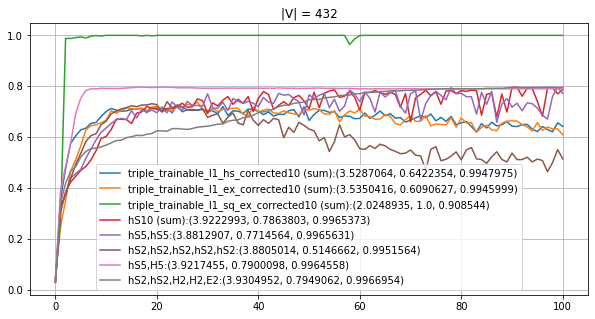


0.6422354	triple_trainable_l1_hs_corrected10 (sum)
0.6090627	triple_trainable_l1_ex_corrected10 (sum)
1.0	triple_trainable_l1_sq_ex_corrected10 (sum)
0.7863803	hS10 (sum)
0.7714564	hS5,hS5
0.5146662	hS2,hS2,hS2,hS2,hS2
0.7900098	hS5,H5
0.7949062	hS2,hS2,H2,H2,E2


=== Current global best:

(3.5287064, 0.6422354, 0.9947975)	triple_trainable_l1_hs_corrected10 (sum)
(3.5350416, 0.6090627, 0.9945999)	triple_trainable_l1_ex_corrected10 (sum)
(2.0248935, 1.0, 0.908544)	triple_trainable_l1_sq_ex_corrected10 (sum)
(3.9222993, 0.7863803, 0.9965373)	hS10 (sum)
(3.8812907, 0.7714564, 0.9965631)	hS5,hS5
(3.8805014, 0.5146662, 0.9951564)	hS2,hS2,hS2,hS2,hS2
(3.9217455, 0.7900098, 0.9964558)	hS5,H5
(3.9304952, 0.7949062, 0.9966954)	hS2,hS2,H2,H2,E2


In [21]:
do_softmax_for_lr(0.1)

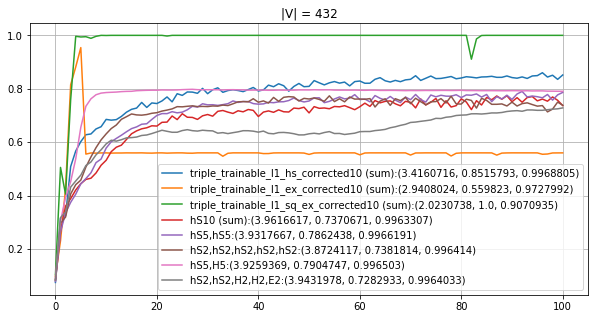


0.8515793	triple_trainable_l1_hs_corrected10 (sum)
0.559823	triple_trainable_l1_ex_corrected10 (sum)
1.0	triple_trainable_l1_sq_ex_corrected10 (sum)
0.7370671	hS10 (sum)
0.7862438	hS5,hS5
0.7381814	hS2,hS2,hS2,hS2,hS2
0.7904747	hS5,H5
0.7282933	hS2,hS2,H2,H2,E2


=== Current global best:

(3.4160716, 0.8515793, 0.9968805)	triple_trainable_l1_hs_corrected10 (sum)
(2.9408024, 0.6090627, 0.9945999)	triple_trainable_l1_ex_corrected10 (sum)
(2.0230738, 1.0, 0.908544)	triple_trainable_l1_sq_ex_corrected10 (sum)
(3.9222993, 0.7863803, 0.9965373)	hS10 (sum)
(3.8812907, 0.7862438, 0.9966191)	hS5,hS5
(3.8724117, 0.7381814, 0.996414)	hS2,hS2,hS2,hS2,hS2
(3.9217455, 0.7904747, 0.996503)	hS5,H5
(3.9304952, 0.7949062, 0.9966954)	hS2,hS2,H2,H2,E2


In [22]:
do_softmax_for_lr(0.05)

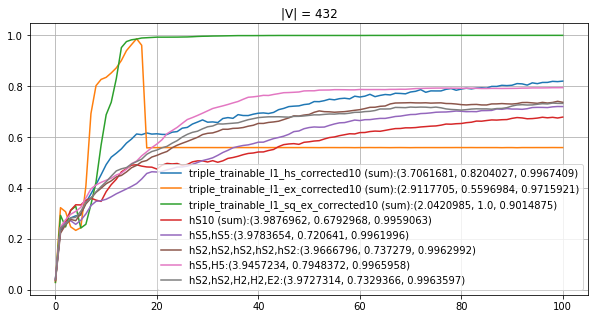


0.8204027	triple_trainable_l1_hs_corrected10 (sum)
0.5596984	triple_trainable_l1_ex_corrected10 (sum)
1.0	triple_trainable_l1_sq_ex_corrected10 (sum)
0.6792968	hS10 (sum)
0.720641	hS5,hS5
0.737279	hS2,hS2,hS2,hS2,hS2
0.7948372	hS5,H5
0.7329366	hS2,hS2,H2,H2,E2


=== Current global best:

(3.4160716, 0.8515793, 0.9968805)	triple_trainable_l1_hs_corrected10 (sum)
(2.9117705, 0.6090627, 0.9945999)	triple_trainable_l1_ex_corrected10 (sum)
(2.0230738, 1.0, 0.908544)	triple_trainable_l1_sq_ex_corrected10 (sum)
(3.9222993, 0.7863803, 0.9965373)	hS10 (sum)
(3.8812907, 0.7862438, 0.9966191)	hS5,hS5
(3.8724117, 0.7381814, 0.996414)	hS2,hS2,hS2,hS2,hS2
(3.9217455, 0.7948372, 0.9965958)	hS5,H5
(3.9304952, 0.7949062, 0.9966954)	hS2,hS2,H2,H2,E2


In [23]:
do_softmax_for_lr(0.01)

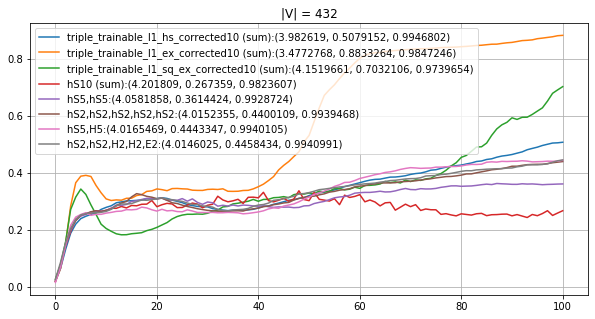


0.5079152	triple_trainable_l1_hs_corrected10 (sum)
0.8833264	triple_trainable_l1_ex_corrected10 (sum)
0.7032106	triple_trainable_l1_sq_ex_corrected10 (sum)
0.267359	hS10 (sum)
0.3614424	hS5,hS5
0.4400109	hS2,hS2,hS2,hS2,hS2
0.4443347	hS5,H5
0.4458434	hS2,hS2,H2,H2,E2


=== Current global best:

(3.4160716, 0.8515793, 0.9968805)	triple_trainable_l1_hs_corrected10 (sum)
(2.9117705, 0.8833264, 0.9945999)	triple_trainable_l1_ex_corrected10 (sum)
(2.0230738, 1.0, 0.9739654)	triple_trainable_l1_sq_ex_corrected10 (sum)
(3.9222993, 0.7863803, 0.9965373)	hS10 (sum)
(3.8812907, 0.7862438, 0.9966191)	hS5,hS5
(3.8724117, 0.7381814, 0.996414)	hS2,hS2,hS2,hS2,hS2
(3.9217455, 0.7948372, 0.9965958)	hS5,H5
(3.9304952, 0.7949062, 0.9966954)	hS2,hS2,H2,H2,E2


In [24]:
do_softmax_for_lr(0.001)

In [66]:
def print_best_softmax_with_max():
    for i, d in enumerate(make_distances(True)):
        ar = np.array([
            softmax_loss_story_nth[i]
            for softmax_loss_story_nth in softmax_loss_storyz
        ])
        ar[:, :, 0] = - ar[:, :, 0]  # max -> min
        ar = ar.max(axis=1)
        ar[:, 0] = - ar[:, 0]  # revert
        
        # print(ar.shape)
        print(f"{ar[:, 0].min(), *ar[:, 1:].max(axis=0)}\t{d}")
        

In [67]:
print_best_softmax()

(3.4160716, 0.8515793, 0.9968805)	triple_trainable_l1_hs_corrected10 (sum)
(2.9117705, 0.8833264, 0.9945999)	triple_trainable_l1_ex_corrected10 (sum)
(2.0230738, 1.0, 0.9739654)	triple_trainable_l1_sq_ex_corrected10 (sum)
(3.9222993, 0.7863803, 0.9965373)	hS10 (sum)
(3.8812907, 0.7862438, 0.9966191)	hS5,hS5
(3.8724117, 0.7381814, 0.996414)	hS2,hS2,hS2,hS2,hS2
(3.9217455, 0.7948372, 0.9965958)	hS5,H5
(3.9304952, 0.7949062, 0.9966954)	hS2,hS2,H2,H2,E2


In [70]:
print_best_softmax_with_max()
# triple_trainable_l1_ex_corrected10 completly (~1 -> 0.5 mAP) failed do converge for some wtf reason, so i will
# just take max (for other metrics too, of course)
# without max it is still better than all opponents (0.88 without max)

(3.4160716, 0.8600227, 0.9969833)	triple_trainable_l1_hs_corrected10 (sum)
(2.9117705, 0.9867344, 0.9964325)	triple_trainable_l1_ex_corrected10 (sum)
(2.022698, 1.0, 0.9914736)	triple_trainable_l1_sq_ex_corrected10 (sum)
(3.9217023, 0.7962431, 0.9966196)	hS10 (sum)
(3.8718914, 0.7956394, 0.9967135)	hS5,hS5
(3.8516317, 0.7734744, 0.9965376)	hS2,hS2,hS2,hS2,hS2
(3.9217455, 0.7979606, 0.9966006)	hS5,H5
(3.9304952, 0.7963326, 0.9966979)	hS2,hS2,H2,H2,E2
